In [6]:
import pandas as pd

# Load your data files
pollen_df = pd.read_csv('../data/2015_pollen_load_data.csv')
visit_df = pd.read_csv('../data/2013_2015_flower_visitation_data.csv')

# Remove rows with merge conflict markers
pollen_df = pollen_df[~pollen_df['Farm'].str.contains('>>>>>>>', na=False)]
visit_df = visit_df[~visit_df['Farm'].str.contains('>>>>>>>', na=False)]

# Check column names first
print("Pollen DataFrame columns:", pollen_df.columns.tolist())
print("Visit DataFrame columns:", visit_df.columns.tolist())

# Merge the DataFrames (adjust column names as needed)
merged_df = pd.merge(pollen_df, visit_df, on='Species', how='inner')

# Convert Load to numeric (it's currently object type)
merged_df['Load'] = pd.to_numeric(merged_df['Load'], errors='coerce')

# Now your groupby code should work (with correct column names)
avg_pollen = merged_df.groupby('Visiting')['Load'].mean().sort_values(ascending=False)
print(avg_pollen)

Pollen DataFrame columns: ['Farm', 'Type', 'Round', 'Date', 'Species', 'Load', 'Netted on', 'Plant pollen', 'Status', 'Proportion', 'Weight']
Visit DataFrame columns: ['Farm', 'Type', 'Round', 'Date', 'Species', 'Number', 'Caste', 'Visiting', 'Status', 'Purpose', 'Family']
Visiting
Arctium minus          1.000000
Lamium purpureum       1.000000
Medicago sativa        1.000000
Vicia sepium           1.000000
Silene dioica          0.886364
                         ...   
Potentilla anserina    0.375000
Stachys sylvatica      0.375000
Stellaria media        0.375000
Trifolium campestre    0.306250
Visiting                    NaN
Name: Load, Length: 99, dtype: float64


In [7]:
def safe_merge_and_analyze():
    """Safely load, merge, and analyze data"""
    
    import pandas as pd
    
    try:
        # Load data
        pollen_df = pd.read_csv('../data/2015_pollen_load_data.csv')
        visit_df = pd.read_csv('../data/2013_2015_flower_visitation_data.csv')
        
        print("✓ Data loaded successfully")
        print(f"Pollen shape: {pollen_df.shape}")
        print(f"Visit shape: {visit_df.shape}")
        
        # Show column names
        print("\nColumn names:")
        print(f"Pollen: {pollen_df.columns.tolist()}")
        print(f"Visit: {visit_df.columns.tolist()}")
        
        # Find common columns for merging
        common_cols = set(pollen_df.columns) & set(visit_df.columns)
        print(f"Common columns for merging: {list(common_cols)}")
        
        if len(common_cols) > 0:
            # Use first common column for merging
            merge_col = list(common_cols)[0]
            merged_df = pd.merge(pollen_df, visit_df, on=merge_col, how='inner')
            
            print(f"✓ Merged on '{merge_col}'")
            print(f"Merged shape: {merged_df.shape}")
            print(f"Merged columns: {merged_df.columns.tolist()}")
            
            # Look for appropriate columns to analyze
            numeric_cols = merged_df.select_dtypes(include=['number']).columns
            categorical_cols = merged_df.select_dtypes(include=['object']).columns
            
            print(f"\nNumeric columns: {numeric_cols.tolist()}")
            print(f"Categorical columns: {categorical_cols.tolist()}")
            
            return merged_df
        else:
            print("No common columns found for merging")
            return None
            
    except Exception as e:
        print(f"Error: {e}")
        return None

# Use the safe function
merged_df = safe_merge_and_analyze()

# If merge was successful, try the analysis
if merged_df is not None:
    # Replace with actual column names from the output above
    # avg_pollen = merged_df.groupby('actual_species_column')['actual_load_column'].mean().sort_values(ascending=False)
    print("Use the column names shown above to create your analysis")

✓ Data loaded successfully
Pollen shape: (3523, 11)
Visit shape: (2467, 11)

Column names:
Pollen: ['Farm', 'Type', 'Round', 'Date', 'Species', 'Load', 'Netted on', 'Plant pollen', 'Status', 'Proportion', 'Weight']
Visit: ['Farm', 'Type', 'Round', 'Date', 'Species', 'Number', 'Caste', 'Visiting', 'Status', 'Purpose', 'Family']
Common columns for merging: ['Status', 'Farm', 'Round', 'Type', 'Date', 'Species']
✓ Merged on 'Status'
Merged shape: (5395549, 21)
Merged columns: ['Farm_x', 'Type_x', 'Round_x', 'Date_x', 'Species_x', 'Load', 'Netted on', 'Plant pollen', 'Status', 'Proportion', 'Weight', 'Farm_y', 'Type_y', 'Round_y', 'Date_y', 'Species_y', 'Number', 'Caste', 'Visiting', 'Purpose', 'Family']

Numeric columns: []
Categorical columns: ['Farm_x', 'Type_x', 'Round_x', 'Date_x', 'Species_x', 'Load', 'Netted on', 'Plant pollen', 'Status', 'Proportion', 'Weight', 'Farm_y', 'Type_y', 'Round_y', 'Date_y', 'Species_y', 'Number', 'Caste', 'Visiting', 'Purpose', 'Family']
Use the column na

In [9]:
# Remove rows with merge conflict markers
merged_df = merged_df[~merged_df['Farm_x'].str.contains('>>>>>>>', na=False)]

# Convert Load to numeric (it's currently object type)
merged_df['Load'] = pd.to_numeric(merged_df['Load'], errors='coerce')

# Analyze with correct column names (likely 'Species' and 'Load')
avg_pollen = merged_df.groupby('Species')['Load'].mean().sort_values(ascending=False)
print(avg_pollen)

Species
Megachile centuncularis        1.000000
Osmia leaiana                  1.000000
Melitta tricincta              1.000000
Melitta leporina               1.000000
Andrena trimmerana             1.000000
Anthophora plumipes            1.000000
Lasioglossum puncticolle       1.000000
Osmia caerulescens             1.000000
Andrena carantonica            0.949074
Andrena florea                 0.916667
Lasioglossum zonulum           0.886364
Andrena alfkenella             0.875000
Colletes daviesanus            0.875000
Andrena fulva                  0.833333
Andrena nitida                 0.825658
Andrena flavipes               0.778153
Lasioglossum malachurum        0.750259
Lasioglossum laevigatum        0.750000
Lasioglossum leucozonium       0.743534
Andrena chrysosceles           0.699755
Andrena wilkella               0.666667
Andrena dorsata                0.660985
Andrena minutuloides           0.659091
Lasioglossum fulvicorne        0.638889
Andrena bicolor                0

C:\Users\schne\AppData\Local\Temp\ipykernel_20260\3275533903.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['Load'] = pd.to_numeric(merged_df['Load'], errors='coerce')


In [10]:
# Calculate average pollen load per flower species 
avg_pollen = merged_df.groupby('Species')['Load'].mean().sort_values(ascending=False)

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


  Using cached matplotlib-3.10.7-cp314-cp314-win_amd64.whl.metadata (11 kB)
  Using cached contourpy-1.3.3-cp314-cp314-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached kiwisolver-1.4.9-cp314-cp314-win_amd64.whl.metadata (6.4 kB)
  Using cached pyparsing-3.2.5-py3-none-any.whl.metadata (5.0 kB)
Using cached matplotlib-3.10.7-cp314-cp314-win_amd64.whl (8.3 MB)
Using cached contourpy-1.3.3-cp314-cp314-win_amd64.whl (232 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
   ---------------------------------------- 2.3/2.3 MB 27.2 MB/s eta 0:00:00
Using cached kiwisolver-1.4.9-cp314-cp314-win_amd64.whl (75 kB)
   ---------------------------------------- 0.0/7.1 MB ? eta -:--:--
   ---------------------------------------- 7.1/7.1 MB 46.4 MB/s eta 0:00:00
Using cached pyparsing-3.2.5-py3-none-any.whl (113 kB)

   ---------------------------------------- 0/7 

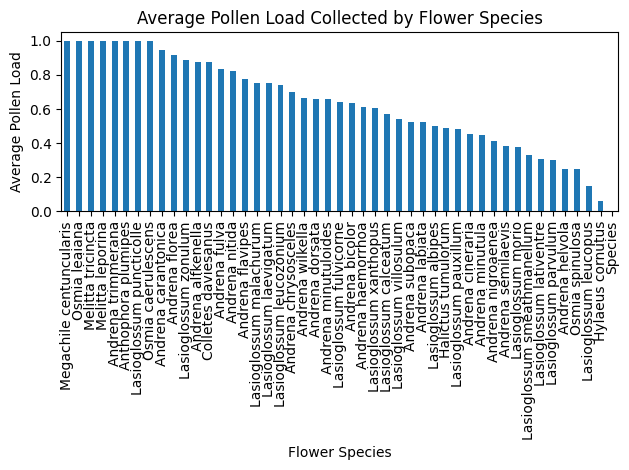

In [13]:
%pip install matplotlib
import matplotlib.pyplot as plt

# Plot
avg_pollen.plot(kind='bar')
plt.title('Average Pollen Load Collected by Flower Species')
plt.xlabel('Flower Species')
plt.ylabel('Average Pollen Load')
plt.tight_layout()
plt.show()

In [15]:
%pip install seaborn
import seaborn as sns


  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


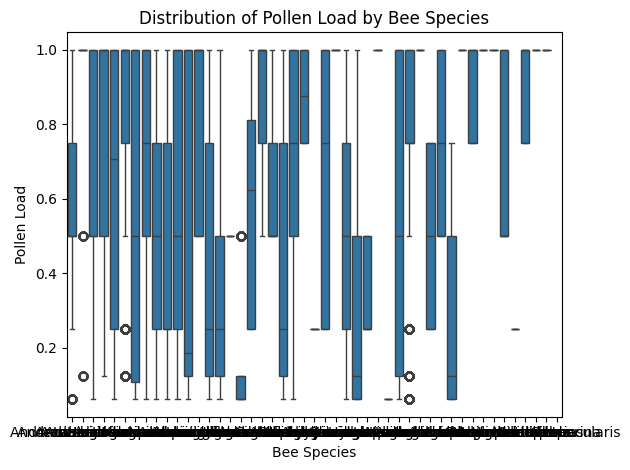

In [18]:
sns.boxplot(x='Species', y='Load', data=merged_df)
plt.title('Distribution of Pollen Load by Bee Species') 
plt.xlabel('Bee Species')
plt.ylabel('Pollen Load')
plt.tight_layout() 
plt.show()

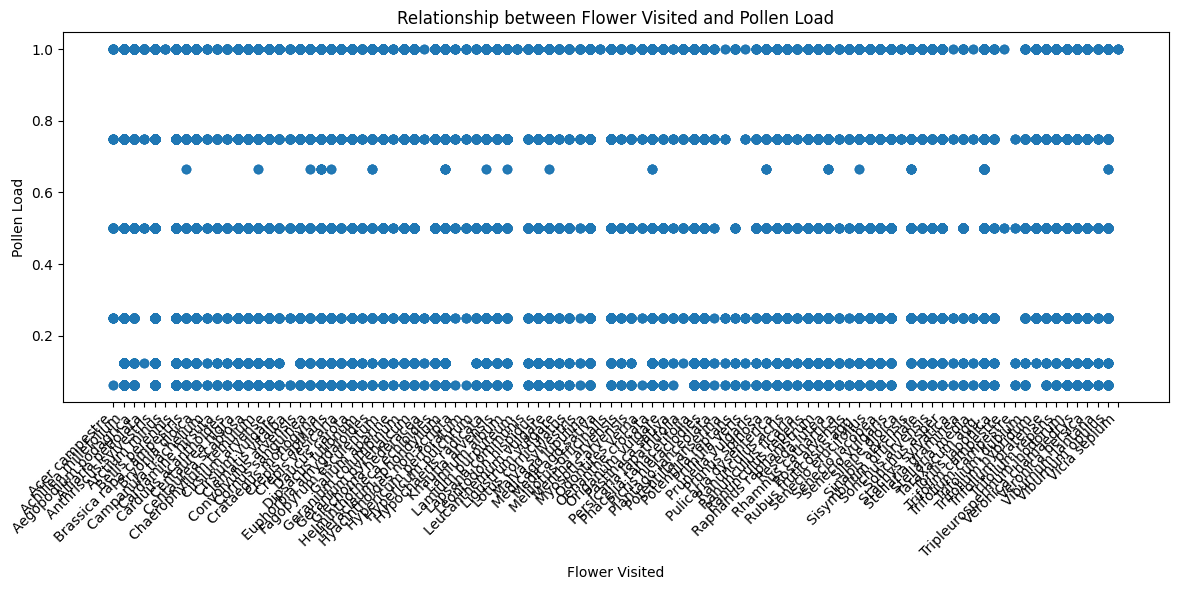

In [22]:
# Remove rows with NaN values in Visiting or Load columns
plot_df = merged_df.dropna(subset=['Visiting', 'Load'])

# Convert Visiting to categorical and get numeric codes for plotting
visiting_codes = pd.Categorical(plot_df['Visiting']).codes
plt.figure(figsize=(12, 6))
plt.scatter(visiting_codes, plot_df['Load'], alpha=0.6)  
plt.title('Relationship between Flower Visited and Pollen Load')
plt.xlabel('Flower Visited')
plt.ylabel('Pollen Load')
plt.xticks(range(len(pd.Categorical(plot_df['Visiting']).categories)), 
		   pd.Categorical(plot_df['Visiting']).categories, rotation=45, ha='right')
plt.tight_layout()
plt.show()

C:\Users\schne\AppData\Local\Temp\ipykernel_20260\654335133.py:7: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


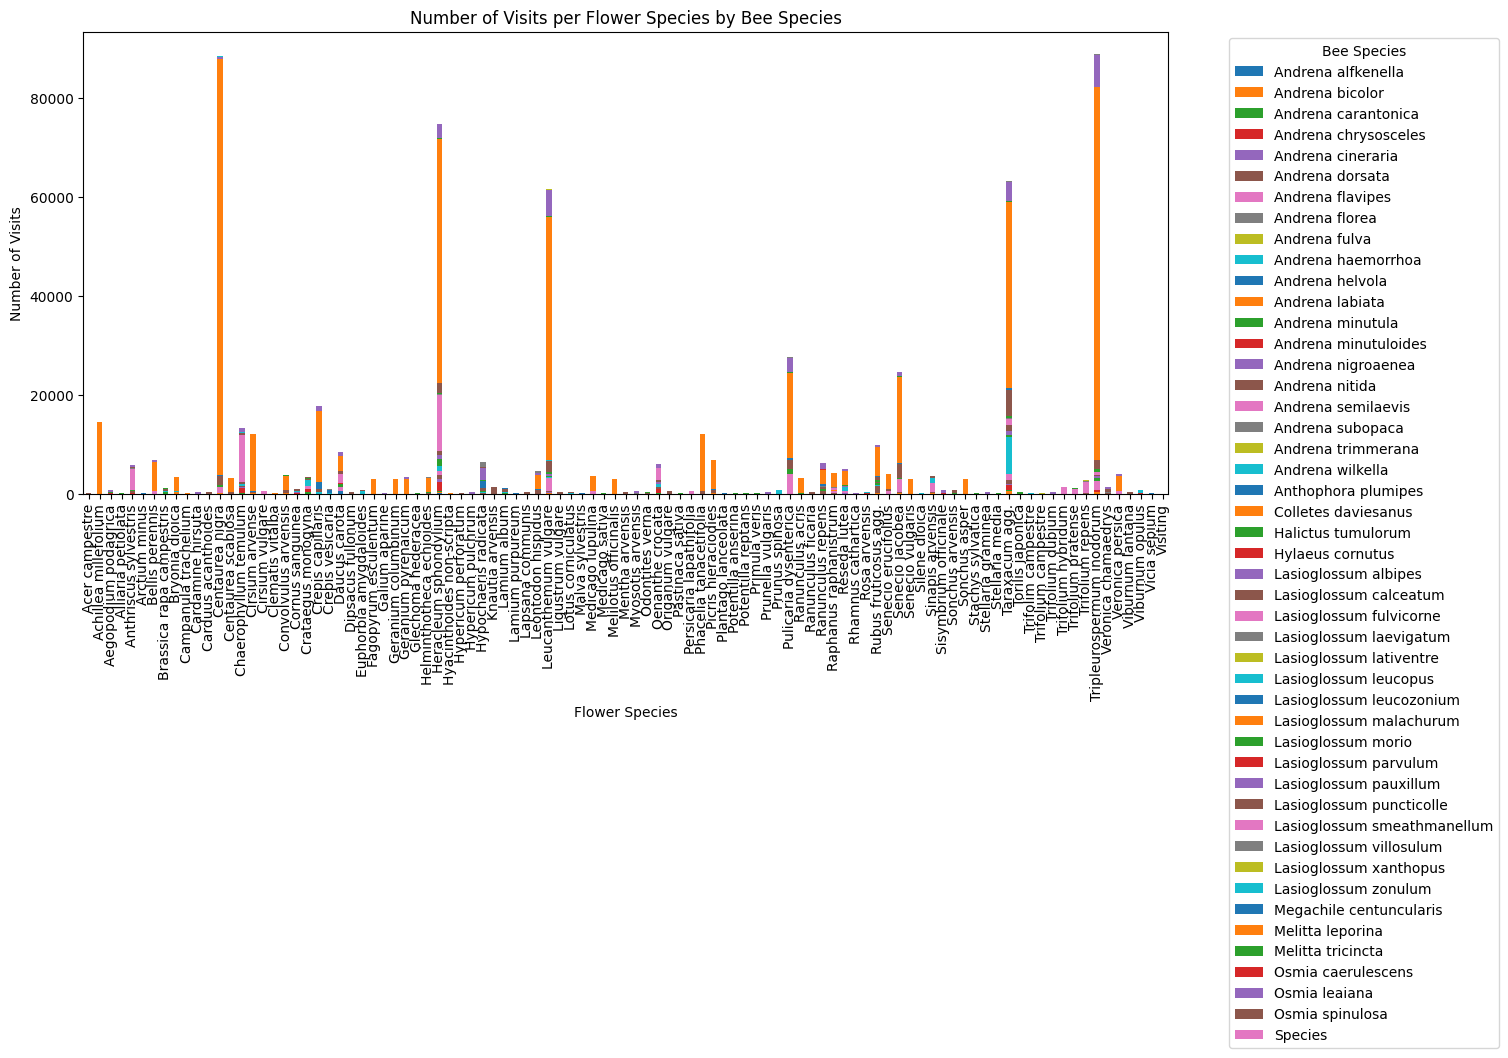

In [24]:
visits = merged_df.groupby(['Visiting', 'Species']).size().unstack().fillna(0)
visits.plot(kind='bar', stacked=True, figsize=(14, 6))
plt.title('Number of Visits per Flower Species by Bee Species')
plt.xlabel('Flower Species')
plt.ylabel('Number of Visits')
plt.legend(title='Bee Species', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()